# Linear Regression

**Solution Methods for obtaining optimal parameters:**

- Normal Equation

- Moore-Penrose Inverse or Pseudoinverse

- Batch Gradient Descent

- Stochastic Gradient Descent

- Mini Batch Gradient Descent

In [1]:
# Generating sample data

import numpy as np

X = np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) 

# np.random.randn(100, 1) is Gaussian Noise, otherwise we will have a straight line.

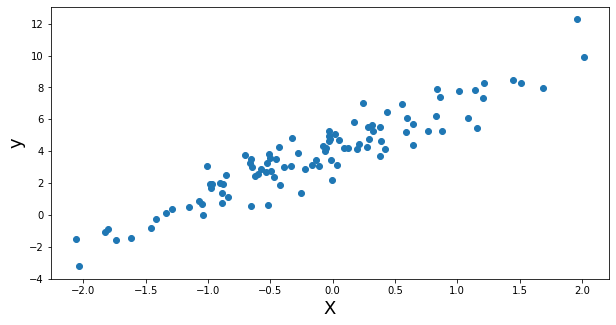

In [2]:
# Our Sample Data

import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.xlabel("X", fontsize = 18)
plt.ylabel("y", fontsize = 18)
plt.plot(X, y, 'o')

In [3]:
# Creating feature vector from our training data X

X_b = np.c_[np.ones((100, 1)), X] 

# Adding x0 = 1 the bias term

# Normal Equation

In [4]:
# Generating optimal parameters by Normal Equation

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

# We have calculated theta_0 and theta_1

array([[3.98463464],
       [2.97667575]])

In [5]:
# Now we can make predictions using our best parameters

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.98463464],
       [9.93798614]])

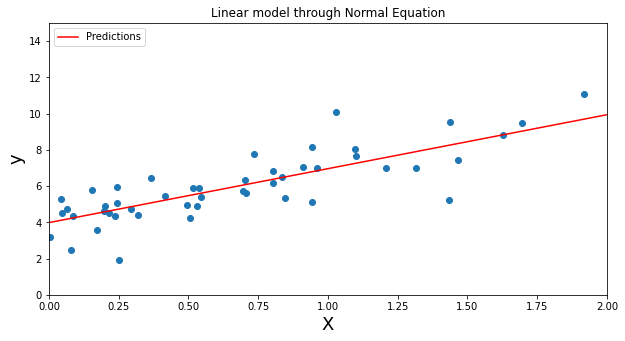

In [6]:
# Plotting our predicted linear model

plt.figure(figsize = (10, 5))
plt.xlabel("X", fontsize = 18)
plt.ylabel("y", fontsize = 18)
plt.plot(X, y, 'o')
plt.plot(X_new, y_predict, 'r-', label = "Predictions")
plt.axis([0, 2, 0, 15])
plt.title("Linear model through Normal Equation")
plt.legend(loc = "upper left")

# Moore-Penrose Inverse or Pseudoinverse

In [7]:
# Generating optimal parameters by Moore-Penrose Inverse or Pseudoinverse

theta_best_pseudo = np.linalg.pinv(X_b).dot(y)
theta_best_pseudo

array([[3.98463464],
       [2.97667575]])

# Batch Gradient Descent

In [8]:
# Generating optimal parameters by Batch Gradient Descent

learn_rate = 0.1
iterations = 1000
m = 100

# Random Initialization

theta = np.random.randn(2, 1)

# Gradient Descent step loop

for i in range(iterations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learn_rate * gradient

theta

array([[3.98463464],
       [2.97667575]])

# Stochastic Gradient Descent

In [9]:
# Stochastic Gradient Descent

n_ecpochs = 50
t0, t1 = 5, 50
m = len(X_b)

def learning_schedule(t):
    return t0 / (t + t1)

# Random Initialization

theta = np.random.randn(2, 1)

# Epoch loop

for epoch in range(n_ecpochs):
    for i in range(m):
        index = np.random.randint(m)
        xi = X_b[index : index + 1]
        yi = y[index : index + 1]
        
        gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradient
theta

array([[3.98343907],
       [3.00353683]])

In [10]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)

In [11]:
sgd.fit(X, y)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [12]:
sgd.intercept_, sgd.coef_

(array([3.93535192]), array([2.98817926]))

# Mini Batch Gradient Descent

In [13]:
# Mini Batch Gradient Descent

t0, t1 = 5, 50
n_epochs = 5
max_iter = 70

theta = np.random.randn(2, 1)

def learning_schedule(t):
    return t0 / (t + t1)

for e in range(n_epochs):
    for i in range(max_iter):
        
        index = np.random.randint(max_iter)
        X_b_batch = X_b[index : ]
        y_batch = y[index : ]
        m = len(X_b_batch)
#         print(X_b_batch.shape, y_batch.shape)
        gradient = 2 / m * X_b_batch.T.dot(X_b_batch.dot(theta) - y_batch)
        
        eta = learning_schedule(e * max_iter + i)
        theta = theta - eta * gradient
        
theta

array([[4.06605325],
       [3.04141596]])

In [14]:
# Generating Prediction

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta)
y_predict

array([[ 4.06605325],
       [10.14888518]])

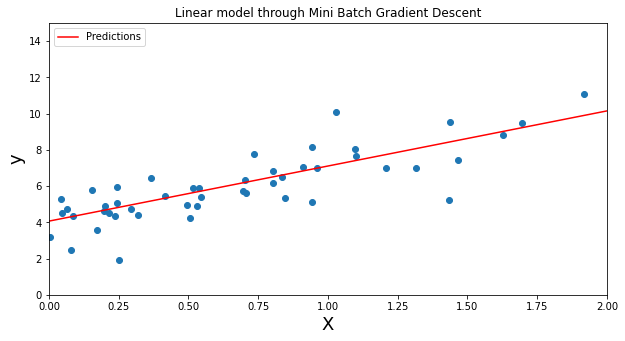

In [16]:
# Plotting our predicted linear model

plt.figure(figsize = (10, 5))
plt.xlabel("X", fontsize = 18)
plt.ylabel("y", fontsize = 18)
plt.plot(X, y, 'o')
plt.plot(X_new, y_predict, 'r-', label = "Predictions")
plt.axis([0, 2, 0, 15])
plt.title("Linear model through Mini Batch Gradient Descent")
plt.legend(loc = "upper left")

# Polynomial Regression

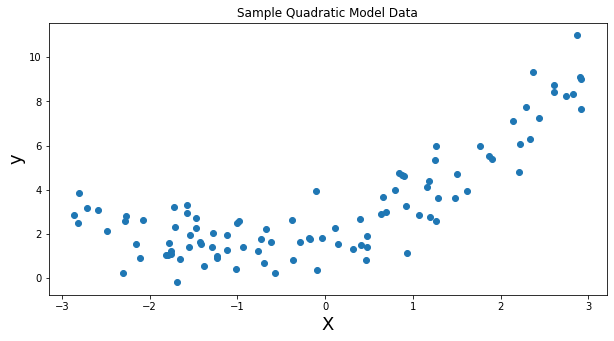

In [32]:
m = 100 # number of samples
X = 6 * np.random.rand(m, 1) - 3

# y = 0.5 * X**3 + X**2 + X + 6 + np.random.randn(m, 1) # Cubic model
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.figure(figsize = (10, 5))
plt.xlabel("X", fontsize = 18)
plt.ylabel("y", fontsize = 18)
plt.title("Sample Quadratic Model Data")
plt.plot(X, y, 'o')

In [98]:
# Generating polynomial features based on the degree

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [99]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_poly, y)

# linear_reg.intercept_, linear_reg.coef_

# actual intercept = 2
# actual coef of X = 1 and X**2 = 0.5

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
# Generating 100 testing points to plot the polynomial model

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.fit_transform(X_new)
X_new_poly[0]

array([-3.,  9.])

In [101]:
y_predict = linear_reg.predict(X_new_poly)

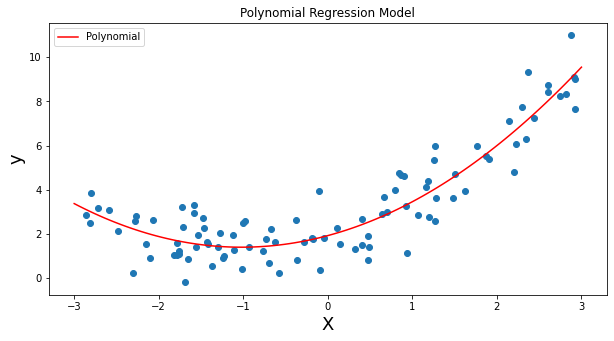

In [102]:
plt.figure(figsize = (10, 5))
plt.xlabel("X", fontsize = 18)
plt.ylabel("y", fontsize = 18)
plt.title("Polynomial Regression Model")
plt.plot(X, y, 'o')
plt.plot(X_new, y_predict, 'r', label = "Polynomial")
plt.legend(loc = "upper left")

# Evaluating Regression Models

- Regression models are evaluated by splitting the data into training and validation sets.

- We iterate from training set size = 1 to the full length of training set at each iteration.

- At each iteration the model is trained on X_train and the training set RMSE and validation set RMSE is calculated.

- These errors are then plotted with respect to the training set size.

- **A wide gap in the beginning between the training and validation errors indicates an overfit model, as training size increases the validation and training error both should come down.**

- **Best model shows a decline in both the validation and traning error as training set size increases.**

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              
    return np.sqrt(train_errors)

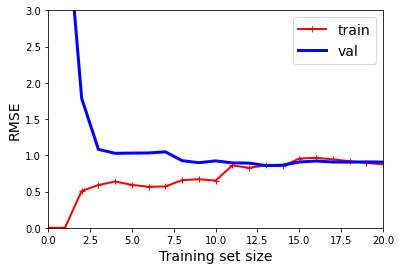

In [10]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lin_reg = LinearRegression()
a = plot_learning_curves(lin_reg, X, y)
plt.axis([0, 20, 0, 3])                         
plt.show()

# Regularized Linear Models

- Ridge Regression

- Lasso Regression

- Elastic Net

- Early Stopping

# Ridge Regression

In [5]:
# Closed form solution 
# matrix factorization technique by André-Louis Cholesky

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[8.45506367]])

In [7]:
# SGD Regressor implementation
# The l2 norm of the parameter vector 
# is the penalty added to the cost function to reduce parameters with cost.

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([8.38748946])

# Lasso Regression

In [9]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([8.29784663])

In [10]:
# SGD Regressor implementation
# The l1 norm of the parameter vector 
# is the penalty added to the cost function to reduce parameters with cost.

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty = "l1")
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([8.39145526])

# Elastic Net

In [11]:
# Elastic Net cost function is a combination of Ridge and Lasso
# The mixture between two is given by l1_ratio
# If l1_ratio = 1 then Lasso and if l1_ratio = 0 then Ridge

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([8.11359399])

# Early Stopping

- Plotting training and validation error with respect to the number of e_pochs.

- Stopping as soon as validation error reaches a minimum.

- As number of e_pochs increase both training and validation error start to decrease, but after a point the validation error starts to go back up, this means the model is starting to overfit the training data.

- When this starts to happen we roll back to the best_model which has the minimum validation error.

- At each e_poch we will save the e_poch number the clone the model which gives a better reduced best_error.

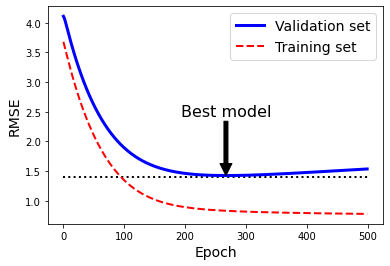

In [2]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.base import clone
import matplotlib.pyplot as plt

np.random.seed(10)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size = 0.5, random_state = 10)

# X_train.shape, X_val.shape, y_train.shape, y_val.shape

poly_scaler = Pipeline([('poly', PolynomialFeatures(degree = 90, include_bias = False)),
                              ('scaler', StandardScaler())])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

X_train_poly_scaled.shape, X_val_poly_scaled.shape

sgd_reg = SGDRegressor(max_iter = 1,
                       tol = -np.infty,
                       warm_start = True,
                       penalty = None,
                       eta0 = 0.0005,
                       learning_rate = "constant",
                       random_state = 42)

n_epochs = 500
train_error = []
val_error = []

best_epoch = None
best_model = None
best_error = float("inf")

for epoch in range(n_epochs):
    
    sgd_reg.fit(X_train_poly_scaled, y_train)
    
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    
    train_error.append(mean_squared_error(y_train, y_train_predict))
    val_error.append(mean_squared_error(y_val, y_val_predict))
    
    val_error_epoch = np.sqrt(mean_squared_error(y_val, y_val_predict))
    
    if val_error_epoch < best_error:
        
        best_error = val_error_epoch
        best_epoch = epoch
        best_model = clone(sgd_reg)

# best_epoch = np.argmin(val_error)
# best_error = np.sqrt(val_error[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_error),
             xytext=(best_epoch, best_error + 1),
             ha="center",
             arrowprops=dict(facecolor='black'),
             fontsize=16,
            )

best_error -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_error, best_error], "k:", linewidth=2)
plt.plot(np.sqrt(val_error), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_error), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

# Logistic Regression

In [3]:
# For the weighted sum of each instances input features
# A logistic value b/w 0 and 1 is calculated
# This logistic value or probability is then used to calculate the cost
# Target values need to be in binary format

from sklearn import datasets

iris = datasets.load_iris()
# list(iris.keys())

# Loading only petal width 
X = iris["data"][:, 3:]

In [4]:
y = (iris["target"] == 2).astype(np.int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

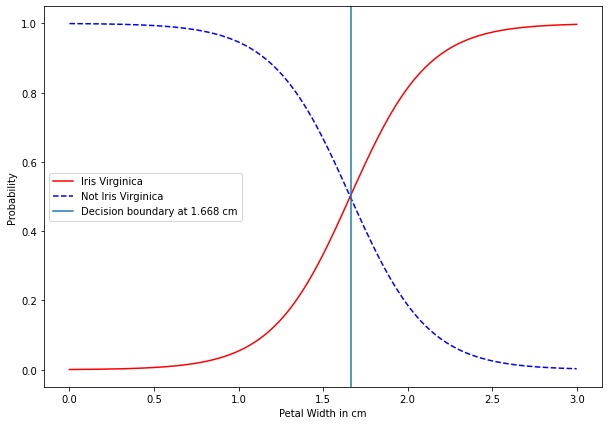

In [6]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_predict = log_reg.predict_proba(X_new)

plt.figure(figsize = (10, 7))
plt.plot(X_new, y_predict[:, 1], 'r-', label = "Iris Virginica")
plt.plot(X_new, y_predict[:, 0], 'b--', label = "Not Iris Virginica")
plt.axvline(x = 1.668, label = "Decision boundary at 1.668 cm")
plt.xlabel("Petal Width in cm")
plt.ylabel("Probability")
plt.legend(loc = "center left")

# Softmax Regression

- Softmax Regression uses the softmax function to calculate the probability for multiple classes, for each instance.

- The cross entropy loss function is used calculate the loss, which calculates a higher loss if the probability for a target class is low and a lower loss if the probability for a target class is high.

- Hyperparameter multi_class = "multinomial" and solver = "lbfgs" can be used to perform softmax regression by LogisticRegression predictor.

In [12]:
from sklearn import datasets

iris = datasets.load_iris()
# list(iris.keys())

# Loading petal length and petal width 
X = iris["data"][:, (2, 3)]

In [8]:
y = iris["target"]
# a = zip(X, y)

# Iris Setosa = 0
# Iris Versicolor = 1
# Iris Virginica = 2
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)

softmax_reg.fit(X, y)
softmax_reg.predict([[5, 2]]), softmax_reg.predict_proba([[5, 2]])

(array([2]), array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]]))

## Meshgrid
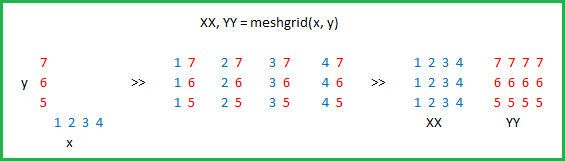

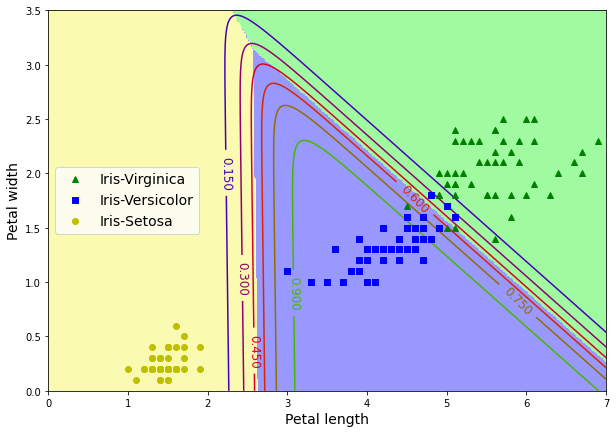

In [50]:
# Meshgrid is used to create multiple testing feature values, for plotting decision boundaries
# The meshgrid creates combination of each value of x0 with values of x1
# So with 500 x0 values and 200 x1 values we will have a total of 200 * 500 values
# In our case x0 = XX and x1 = YY
# x0 = petal length and x1 = petal width

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]
x0.shape, x1.shape, X_new.shape

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

# select probabilities of a certain class to plot decision lines
zz1 = y_proba[:, 1].reshape(x0.shape)

# select predicted classes
# reshaping to match coordinate value in x0 and x1
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 7))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

# countourf fills colour based on zz or predicted classes
plt.contourf(x0, x1, zz, cmap=custom_cmap)

# countour adds 5 lines based on value of zz1 or predicted probabilities of class 1 (Iris Virginica)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
# save_fig("softmax_regression_contour_plot")
plt.show()